In [1]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
X = pd.read_csv('cox-violent-parsed_filt.csv')

In [3]:
#removing id column
X = X.drop(['id'], axis=1)

In [4]:
#removing duplicates
X = X.drop_duplicates()
X

,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,5,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,3,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,4,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,8,...,NaN,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0
10,bouthy pierrelouis,bouthy,pierrelouis,Male,22/01/1973,43,25 - 45,Other,0,1,...,NaN,Risk of Recidivism,1,Low,26/03/2013,Risk of Violence,1,Low,2,0
11,marsha miles,marsha,miles,Male,22/08/1971,44,25 - 45,Other,0,1,...,NaN,Risk of Recidivism,1,Low,30/11/2013,Risk of Violence,1,Low,0,0
12,edward riddle,edward,riddle,Male,23/07/1974,41,25 - 45,Caucasian,0,6,...,NaN,Risk of Recidivism,6,Medium,19/02/2014,Risk of Violence,2,Low,14,0
14,steven stewart,steven,stewart,Male,25/02/1973,43,25 - 45,Other,0,4,...,NaN,Risk of Recidivism,4,Low,30/08/2013,Risk of Violence,3,Low,3,0
17,elizabeth thieme,elizabeth,thieme,Female,03/06/1976,39,25 - 45,Caucasian,0,1,...,NaN,Risk of Recidivism,1,Low,16/03/2014,Risk of Violence,1,Low,0,0


In [5]:
X = X.drop(['name','first','last','dob'], axis=1) #removing unnecessary columns 
X = X.drop(['violent_recid'], axis=1) #This column has all NA values
# X.dropna(subset = ["r_charge_desc"], inplace=True) #I got rid of datasets that dont have values for this because
#there is a lot of data with nas and it is hard to classify someone with this missing value as another value
X = X.drop(['vr_charge_degree','vr_offense_date','vr_charge_desc'], axis=1) #getting rid of columns that aren't relevant .
#These columns describe the recharge (and has 93% na)
X = X.drop(['type_of_assessment','v_type_of_assessment'], axis=1) #lack of info--all records have 100% risk of rec
#and risk of violence 
X = X.drop(['decile_score','score_text'], axis=1) #this is the COMPAS algo resulted scores for rec
#;shouldn't have this in our model
X = X.drop(['v_decile_score','v_score_text'], axis=1) #this is the COMPAS algo resulted scores for violence
#;shouldn't have this in our model
X = X.drop(['event'], axis=1) #event is the same as target variable
X

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,...,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,is_violent_recid,decile_score.1,screening_date,priors_count.1
0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,13/08/2013 6:03,...,0,NaN,NaN,NaN,NaN,NaN,0,1,14/08/2013,0
2,Male,31,25 - 45,Caucasian,0,0,0,0,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,0,5,31/12/2014,0
3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,26/01/2013 3:45,...,1,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,1,3,27/01/2013,0
4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,13/04/2013 4:58,...,1,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,0,4,14/04/2013,4
9,Male,23,Less than 25,African-American,0,1,0,1,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,8,13/01/2013,1
10,Male,43,25 - 45,Other,0,0,0,2,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,1,26/03/2013,2
11,Male,44,25 - 45,Other,0,0,0,0,0.0,30/11/2013 4:50,...,0,NaN,NaN,NaN,NaN,NaN,0,1,30/11/2013,0
12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,18/02/2014 5:08,...,1,(F2),0.0,31/03/2014,Poss of Firearm by Convic Felo,31/03/2014,0,6,19/02/2014,14
14,Male,43,25 - 45,Other,0,0,0,3,-1.0,29/08/2013 8:55,...,0,NaN,NaN,NaN,NaN,NaN,0,4,30/08/2013,3
17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,15/03/2014 5:35,...,0,NaN,NaN,NaN,NaN,NaN,0,1,16/03/2014,0


In [6]:
X= X.reset_index()
X

,index,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,is_violent_recid,decile_score.1,screening_date,priors_count.1
0,0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,1,14/08/2013,0
1,2,Male,31,25 - 45,Caucasian,0,0,0,0,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,0,5,31/12/2014,0
2,3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,...,1,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,1,3,27/01/2013,0
3,4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,...,1,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,0,4,14/04/2013,4
4,9,Male,23,Less than 25,African-American,0,1,0,1,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,8,13/01/2013,1
5,10,Male,43,25 - 45,Other,0,0,0,2,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,1,26/03/2013,2
6,11,Male,44,25 - 45,Other,0,0,0,0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,0,1,30/11/2013,0
7,12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,...,1,(F2),0.0,31/03/2014,Poss of Firearm by Convic Felo,31/03/2014,0,6,19/02/2014,14
8,14,Male,43,25 - 45,Other,0,0,0,3,-1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,4,30/08/2013,3
9,17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,1,16/03/2014,0


In [7]:
X.dropna(subset = ["c_jail_in","c_jail_out"], inplace=True) #getting rid of missing values for these because i want to 

In [8]:
X = X.drop(['is_violent_recid'], axis=1) #not choosing this as target variable; will choose is_recid

In [9]:
X

,index,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,decile_score.1,screening_date,priors_count.1
0,0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,...,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,1,14/08/2013,0
2,3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,...,Felony Battery w/Prior Convict,1,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,3,27/01/2013,0
3,4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,...,Possession of Cocaine,1,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,4,14/04/2013,4
6,11,Male,44,25 - 45,Other,0,0,0,0,0.0,...,Battery,0,NaN,NaN,NaN,NaN,NaN,1,30/11/2013,0
7,12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,...,Possession Burglary Tools,1,(F2),0.0,31/03/2014,Poss of Firearm by Convic Felo,31/03/2014,6,19/02/2014,14
8,14,Male,43,25 - 45,Other,0,0,0,3,-1.0,...,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,4,30/08/2013,3
9,17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,...,Battery,0,NaN,NaN,NaN,NaN,NaN,1,16/03/2014,0
10,18,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,...,Possession Of Alprazolam,0,NaN,NaN,NaN,NaN,NaN,10,09/12/2013,0
11,21,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,...,Possession Of Alprazolam,0,NaN,NaN,NaN,NaN,NaN,5,05/09/2014,0
12,24,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,...,Insurance Fraud,1,(M1),0.0,06/01/2015,Battery,06/01/2015,3,04/11/2013,1


In [10]:
X = X.drop(['r_charge_degree','r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','decile_score.1'], axis=1) #getting rid of columns that aren't relevant .
#These columns describe the recharge (and has 93% na)

In [11]:
X

,index,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1
0,0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0
2,3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,1.0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0
3,4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,1.0,(F3),Possession of Cocaine,1,14/04/2013,4
6,11,Male,44,25 - 45,Other,0,0,0,0,0.0,30/11/2013 4:50,01/12/2013 12:28,0.0,(M1),Battery,0,30/11/2013,0
7,12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,18/02/2014 5:08,24/02/2014 12:18,1.0,(F3),Possession Burglary Tools,1,19/02/2014,14
8,14,Male,43,25 - 45,Other,0,0,0,3,-1.0,29/08/2013 8:55,30/08/2013 8:42,1.0,(F3),arrest case no charge,0,30/08/2013,3
9,17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,15/03/2014 5:35,18/03/2014 4:28,1.0,(M1),Battery,0,16/03/2014,0
10,18,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,08/12/2013 8:17,10/01/2014 12:16,1.0,(F3),Possession Of Alprazolam,0,09/12/2013,0
11,21,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,04/09/2014 2:37,05/09/2014 8:41,1.0,(F3),Possession Of Alprazolam,0,05/09/2014,0
12,24,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,06/01/2015 3:55,07/01/2015 3:38,308.0,(F2),Insurance Fraud,1,04/11/2013,1


In [12]:
X.dropna(subset = ["is_recid"], inplace=True)

In [13]:
X

,index,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1
0,0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0
2,3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,1.0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0
3,4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,1.0,(F3),Possession of Cocaine,1,14/04/2013,4
6,11,Male,44,25 - 45,Other,0,0,0,0,0.0,30/11/2013 4:50,01/12/2013 12:28,0.0,(M1),Battery,0,30/11/2013,0
7,12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,18/02/2014 5:08,24/02/2014 12:18,1.0,(F3),Possession Burglary Tools,1,19/02/2014,14
8,14,Male,43,25 - 45,Other,0,0,0,3,-1.0,29/08/2013 8:55,30/08/2013 8:42,1.0,(F3),arrest case no charge,0,30/08/2013,3
9,17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,15/03/2014 5:35,18/03/2014 4:28,1.0,(M1),Battery,0,16/03/2014,0
10,18,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,08/12/2013 8:17,10/01/2014 12:16,1.0,(F3),Possession Of Alprazolam,0,09/12/2013,0
11,21,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,04/09/2014 2:37,05/09/2014 8:41,1.0,(F3),Possession Of Alprazolam,0,05/09/2014,0
12,24,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,06/01/2015 3:55,07/01/2015 3:38,308.0,(F2),Insurance Fraud,1,04/11/2013,1


In [14]:
X_missing = X.isnull()
number_missing = X_missing.sum()
number_missing
number_missing /len(X)

index                      0.000000
sex                        0.000000
age                        0.000000
age_cat                    0.000000
race                       0.000000
juv_fel_count              0.000000
juv_misd_count             0.000000
juv_other_count            0.000000
priors_count               0.000000
days_b_screening_arrest    0.000000
c_jail_in                  0.000000
c_jail_out                 0.000000
c_days_from_compas         0.000000
c_charge_degree            0.000000
c_charge_desc              0.000686
is_recid                   0.000000
screening_date             0.000000
priors_count.1             0.000000
dtype: float64

In [15]:
X.dropna(subset = ["c_charge_desc"], inplace=True)

In [16]:
X

,index,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1
0,0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0
2,3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,1.0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0
3,4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,1.0,(F3),Possession of Cocaine,1,14/04/2013,4
6,11,Male,44,25 - 45,Other,0,0,0,0,0.0,30/11/2013 4:50,01/12/2013 12:28,0.0,(M1),Battery,0,30/11/2013,0
7,12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,18/02/2014 5:08,24/02/2014 12:18,1.0,(F3),Possession Burglary Tools,1,19/02/2014,14
8,14,Male,43,25 - 45,Other,0,0,0,3,-1.0,29/08/2013 8:55,30/08/2013 8:42,1.0,(F3),arrest case no charge,0,30/08/2013,3
9,17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,15/03/2014 5:35,18/03/2014 4:28,1.0,(M1),Battery,0,16/03/2014,0
10,18,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,08/12/2013 8:17,10/01/2014 12:16,1.0,(F3),Possession Of Alprazolam,0,09/12/2013,0
11,21,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,04/09/2014 2:37,05/09/2014 8:41,1.0,(F3),Possession Of Alprazolam,0,05/09/2014,0
12,24,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,06/01/2015 3:55,07/01/2015 3:38,308.0,(F2),Insurance Fraud,1,04/11/2013,1


In [17]:
X= X.reset_index()
X

,level_0,index,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1
0,0,0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0
1,2,3,Male,34,25 - 45,African-American,0,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,1.0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0
2,3,4,Male,24,Less than 25,African-American,0,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,1.0,(F3),Possession of Cocaine,1,14/04/2013,4
3,6,11,Male,44,25 - 45,Other,0,0,0,0,0.0,30/11/2013 4:50,01/12/2013 12:28,0.0,(M1),Battery,0,30/11/2013,0
4,7,12,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,18/02/2014 5:08,24/02/2014 12:18,1.0,(F3),Possession Burglary Tools,1,19/02/2014,14
5,8,14,Male,43,25 - 45,Other,0,0,0,3,-1.0,29/08/2013 8:55,30/08/2013 8:42,1.0,(F3),arrest case no charge,0,30/08/2013,3
6,9,17,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,15/03/2014 5:35,18/03/2014 4:28,1.0,(M1),Battery,0,16/03/2014,0
7,10,18,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,08/12/2013 8:17,10/01/2014 12:16,1.0,(F3),Possession Of Alprazolam,0,09/12/2013,0
8,11,21,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,04/09/2014 2:37,05/09/2014 8:41,1.0,(F3),Possession Of Alprazolam,0,05/09/2014,0
9,12,24,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,06/01/2015 3:55,07/01/2015 3:38,308.0,(F2),Insurance Fraud,1,04/11/2013,1


In [18]:
#have a column that has the difference of these instead of the times

X['c_jail_in'] = pd.to_datetime(X['c_jail_in'])
X['c_jail_out'] = pd.to_datetime(X['c_jail_out'])
X['jail_time'] = X['c_jail_out'] - X['c_jail_in']

In [19]:
X = X.drop(['level_0'], axis=1) 

In [20]:
X = X.drop(['index'], axis=1) 
X

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1,jail_time
0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,2013-08-13 06:03:00,2013-08-14 05:41:00,1.0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0,0 days 23:38:00
1,Male,34,25 - 45,African-American,0,0,0,0,-1.0,2013-01-26 03:45:00,2013-05-02 05:36:00,1.0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0,96 days 01:51:00
2,Male,24,Less than 25,African-American,0,0,1,4,-1.0,2013-04-13 04:58:00,2013-04-14 07:02:00,1.0,(F3),Possession of Cocaine,1,14/04/2013,4,1 days 02:04:00
3,Male,44,25 - 45,Other,0,0,0,0,0.0,2013-11-30 04:50:00,2013-01-12 12:28:00,0.0,(M1),Battery,0,30/11/2013,0,-322 days +07:38:00
4,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,2014-02-18 05:08:00,2014-02-24 12:18:00,1.0,(F3),Possession Burglary Tools,1,19/02/2014,14,6 days 07:10:00
5,Male,43,25 - 45,Other,0,0,0,3,-1.0,2013-08-29 08:55:00,2013-08-30 08:42:00,1.0,(F3),arrest case no charge,0,30/08/2013,3,0 days 23:47:00
6,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,2014-03-15 05:35:00,2014-03-18 04:28:00,1.0,(M1),Battery,0,16/03/2014,0,2 days 22:53:00
7,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,2013-08-12 08:17:00,2014-10-01 12:16:00,1.0,(F3),Possession Of Alprazolam,0,09/12/2013,0,415 days 03:59:00
8,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,2014-04-09 02:37:00,2014-05-09 08:41:00,1.0,(F3),Possession Of Alprazolam,0,05/09/2014,0,30 days 06:04:00
9,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,2015-06-01 03:55:00,2015-07-01 03:38:00,308.0,(F2),Insurance Fraud,1,04/11/2013,1,29 days 23:43:00


In [23]:
X = X[X["is_recid"]>=0]
X

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1,jail_time
0,Male,69,Greater than 45,Other,0,0,0,0,-1.0,2013-08-13 06:03:00,2013-08-14 05:41:00,1.0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0,0 days 23:38:00
1,Male,34,25 - 45,African-American,0,0,0,0,-1.0,2013-01-26 03:45:00,2013-05-02 05:36:00,1.0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0,96 days 01:51:00
2,Male,24,Less than 25,African-American,0,0,1,4,-1.0,2013-04-13 04:58:00,2013-04-14 07:02:00,1.0,(F3),Possession of Cocaine,1,14/04/2013,4,1 days 02:04:00
3,Male,44,25 - 45,Other,0,0,0,0,0.0,2013-11-30 04:50:00,2013-01-12 12:28:00,0.0,(M1),Battery,0,30/11/2013,0,-322 days +07:38:00
4,Male,41,25 - 45,Caucasian,0,0,0,14,-1.0,2014-02-18 05:08:00,2014-02-24 12:18:00,1.0,(F3),Possession Burglary Tools,1,19/02/2014,14,6 days 07:10:00
5,Male,43,25 - 45,Other,0,0,0,3,-1.0,2013-08-29 08:55:00,2013-08-30 08:42:00,1.0,(F3),arrest case no charge,0,30/08/2013,3,0 days 23:47:00
6,Female,39,25 - 45,Caucasian,0,0,0,0,-1.0,2014-03-15 05:35:00,2014-03-18 04:28:00,1.0,(M1),Battery,0,16/03/2014,0,2 days 22:53:00
7,Male,20,Less than 25,Caucasian,0,0,1,0,-1.0,2013-08-12 08:17:00,2014-10-01 12:16:00,1.0,(F3),Possession Of Alprazolam,0,09/12/2013,0,415 days 03:59:00
8,Female,26,25 - 45,Caucasian,0,0,0,0,-1.0,2014-04-09 02:37:00,2014-05-09 08:41:00,1.0,(F3),Possession Of Alprazolam,0,05/09/2014,0,30 days 06:04:00
9,Male,21,Less than 25,Caucasian,0,0,0,1,428.0,2015-06-01 03:55:00,2015-07-01 03:38:00,308.0,(F2),Insurance Fraud,1,04/11/2013,1,29 days 23:43:00


In [24]:
#Convert jail_time to some int

In [26]:
X = X.drop(['days_b_screening_arrest','c_jail_in','c_jail_out','c_days_from_compas'], axis=1) 
X

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,screening_date,priors_count.1,jail_time
0,Male,69,Greater than 45,Other,0,0,0,0,(F3),Aggravated Assault w/Firearm,0,14/08/2013,0,0 days 23:38:00
1,Male,34,25 - 45,African-American,0,0,0,0,(F3),Felony Battery w/Prior Convict,1,27/01/2013,0,96 days 01:51:00
2,Male,24,Less than 25,African-American,0,0,1,4,(F3),Possession of Cocaine,1,14/04/2013,4,1 days 02:04:00
3,Male,44,25 - 45,Other,0,0,0,0,(M1),Battery,0,30/11/2013,0,-322 days +07:38:00
4,Male,41,25 - 45,Caucasian,0,0,0,14,(F3),Possession Burglary Tools,1,19/02/2014,14,6 days 07:10:00
5,Male,43,25 - 45,Other,0,0,0,3,(F3),arrest case no charge,0,30/08/2013,3,0 days 23:47:00
6,Female,39,25 - 45,Caucasian,0,0,0,0,(M1),Battery,0,16/03/2014,0,2 days 22:53:00
7,Male,20,Less than 25,Caucasian,0,0,1,0,(F3),Possession Of Alprazolam,0,09/12/2013,0,415 days 03:59:00
8,Female,26,25 - 45,Caucasian,0,0,0,0,(F3),Possession Of Alprazolam,0,05/09/2014,0,30 days 06:04:00
9,Male,21,Less than 25,Caucasian,0,0,0,1,(F2),Insurance Fraud,1,04/11/2013,1,29 days 23:43:00


In [30]:
X['jail_time'] = X['jail_time'].dt.seconds

AttributeError: Can only use .dt accessor with datetimelike values

In [33]:
X = X.drop(['screening_date'], axis=1) 

In [34]:
X

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,priors_count.1,jail_time
0,Male,69,Greater than 45,Other,0,0,0,0,(F3),Aggravated Assault w/Firearm,0,0,85080
1,Male,34,25 - 45,African-American,0,0,0,0,(F3),Felony Battery w/Prior Convict,1,0,6660
2,Male,24,Less than 25,African-American,0,0,1,4,(F3),Possession of Cocaine,1,4,7440
3,Male,44,25 - 45,Other,0,0,0,0,(M1),Battery,0,0,27480
4,Male,41,25 - 45,Caucasian,0,0,0,14,(F3),Possession Burglary Tools,1,14,25800
5,Male,43,25 - 45,Other,0,0,0,3,(F3),arrest case no charge,0,3,85620
6,Female,39,25 - 45,Caucasian,0,0,0,0,(M1),Battery,0,0,82380
7,Male,20,Less than 25,Caucasian,0,0,1,0,(F3),Possession Of Alprazolam,0,0,14340
8,Female,26,25 - 45,Caucasian,0,0,0,0,(F3),Possession Of Alprazolam,0,0,21840
9,Male,21,Less than 25,Caucasian,0,0,0,1,(F2),Insurance Fraud,1,1,85380


In [35]:
X_missing = X.isnull()
number_missing = X_missing.sum()
number_missing
number_missing /len(X)

sex                0.0
age                0.0
age_cat            0.0
race               0.0
juv_fel_count      0.0
juv_misd_count     0.0
juv_other_count    0.0
priors_count       0.0
c_charge_degree    0.0
c_charge_desc      0.0
is_recid           0.0
priors_count.1     0.0
jail_time          0.0
dtype: float64

In [36]:
X.to_csv('compas.csv', index=False)

## Graphs

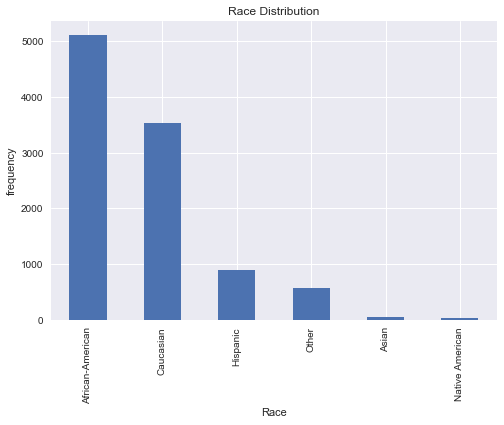

In [76]:
X['race'].value_counts().plot(kind='bar')
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("frequency")

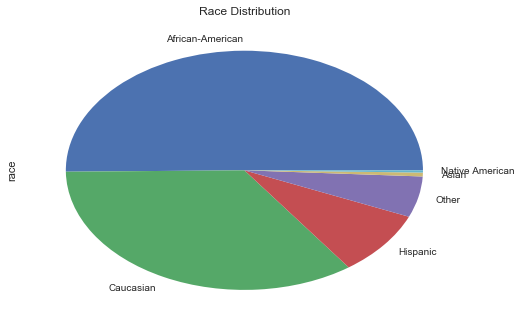

In [55]:
X['race'].value_counts().plot(kind='pie')
plt.title("Race Distribution")

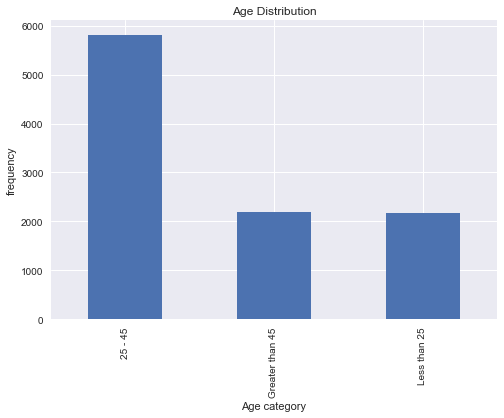

In [75]:
X['age_cat'].value_counts().plot(kind='bar')
plt.title("Age Distribution")
plt.xlabel("Age category")
plt.ylabel("frequency")

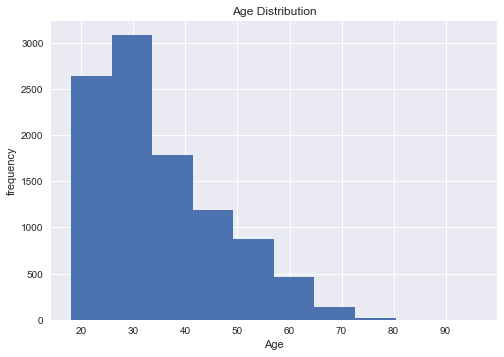

In [74]:
plt.hist(X['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("frequency")

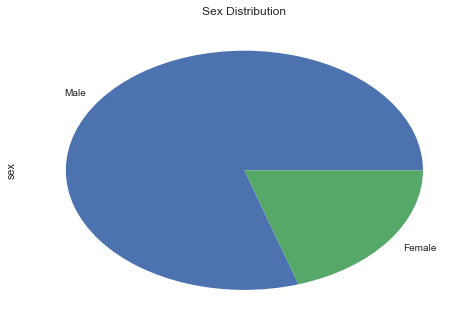

In [57]:
X['sex'].value_counts().plot(kind='pie')
plt.title("Sex Distribution")

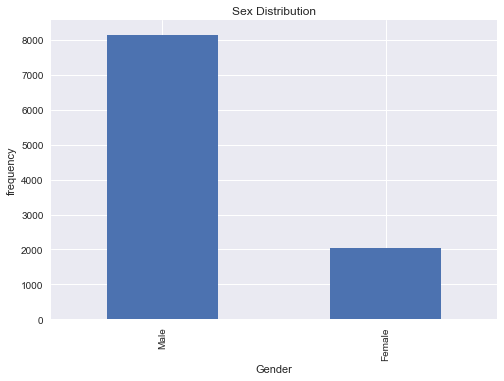

In [73]:
X['sex'].value_counts().plot(kind='bar')
plt.title("Sex Distribution")
plt.xlabel("Gender")
plt.ylabel("frequency")

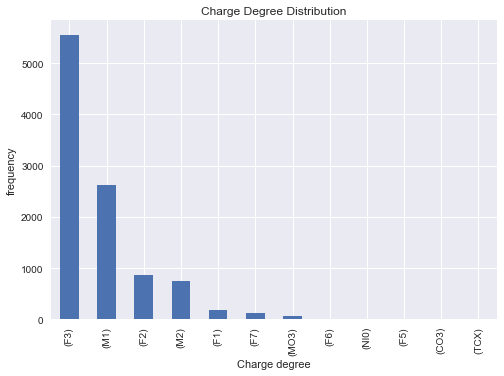

In [72]:
X['c_charge_degree'].value_counts().plot(kind='bar')
plt.title("Charge Degree Distribution")
plt.xlabel("Charge degree")
plt.ylabel("frequency")

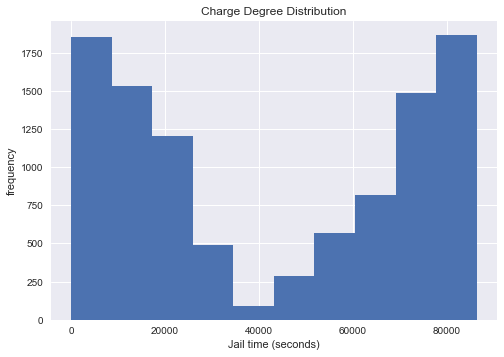

In [71]:
X['jail_time'].hist()
plt.title("Charge Degree Distribution")
plt.xlabel("Jail time (seconds)")
plt.ylabel("frequency")